# Outlier detection and removal using z-score and standard deviation in python pandas

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [3]:
df = pd.read_csv("heights12.csv")
df.sample(5)

,gender,height
2322,Male,69.489247
6818,Female,67.390020
9625,Female,58.032173
8307,Female,62.684252
9299,Female,65.951549


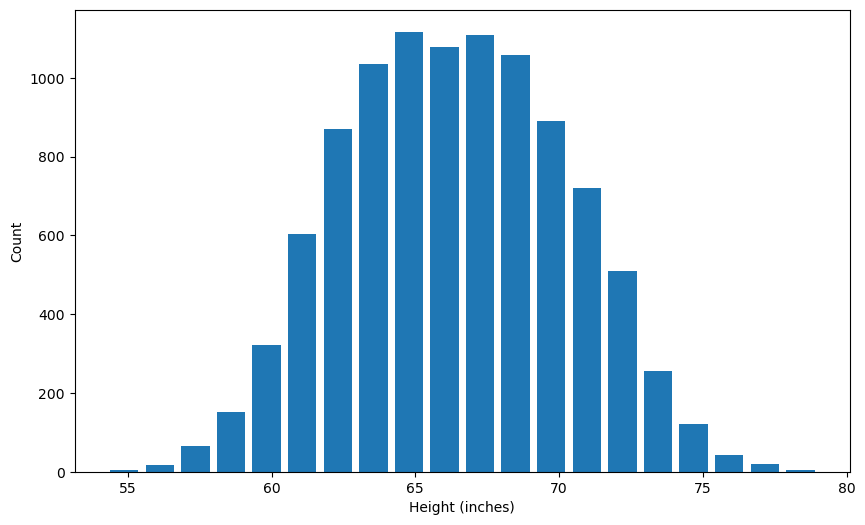

In [4]:
#plotting histogram in order to understand data distribution
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

In [5]:
#this histogram shows normal distribution

plotting bell curve for our visualization purpose

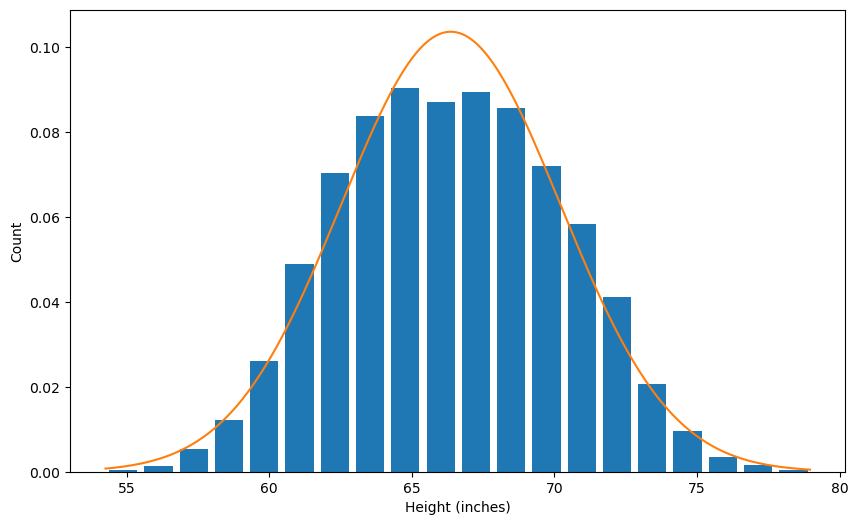

In [6]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

#code for plotting bell curve
rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

np.arange(df.height.min(), df.height.max(), 0.1): This creates an array (rng) of values starting from the minimum height in your DataFrame (df.height.min()) to the maximum height (df.height.max()) with a step size of 0.1.

norm.pdf(rng, df.height.mean(), df.height.std()): This calculates the probability density function (PDF) of a normal distribution using the norm class from the SciPy library. It takes the array of values (rng), the mean of the height data in your DataFrame (df.height.mean()), and the standard deviation of the height data (df.height.std()).

plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std())): This plots the calculated PDF using Matplotlib. It plots the values in rng on the x-axis and the corresponding PDF values on the y-axis.

In [7]:
df.height.mean()

66.367559754866

In [8]:

df.height.std()

3.847528120795573

## (1) Outlier detection and removal using 3 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [10]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [11]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392479274

Here are the outliers that are beyond 3 std dev from mean

In [12]:
df[(df.height>upper_limit) | (df.height<lower_limit)]


,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

### Now remove these outliers and generate new dataframe

In [13]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [14]:
df_no_outlier_std_dev.shape

(9993, 2)

In [15]:
df.shape

(10000, 2)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993)

## (2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

In [16]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [17]:
(73.84-66.37)/3.84

1.9453124999999998

#### Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [18]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [19]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [20]:
#Here is the list of all outliers
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


# #Remove the outliers and produce new dataframe

In [21]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [22]:
df_no_outliers.shape

(9993, 3)

In [23]:
df.shape

(10000, 3)

# Exercise: Outlier removal using standard deviation and z score
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [24]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [25]:
df = pd.read_csv("bhp.csv")
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


We will quickly examine price_per_sqft column to check min,max,mean and percentile values

In [26]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

 Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

Also plot histogram to see how is the data distribution

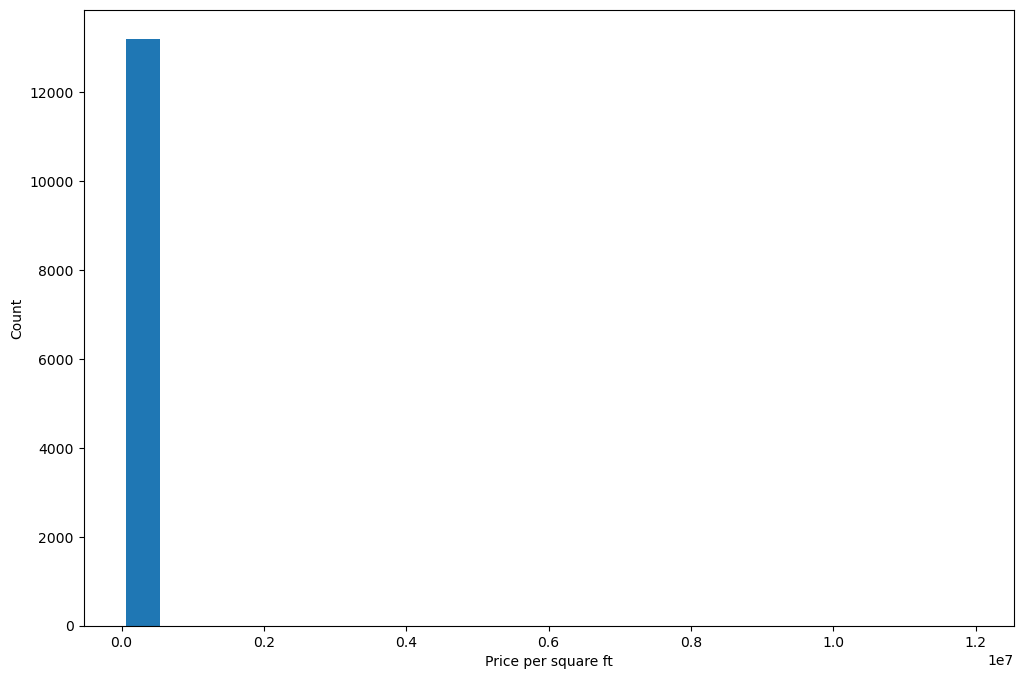

In [27]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

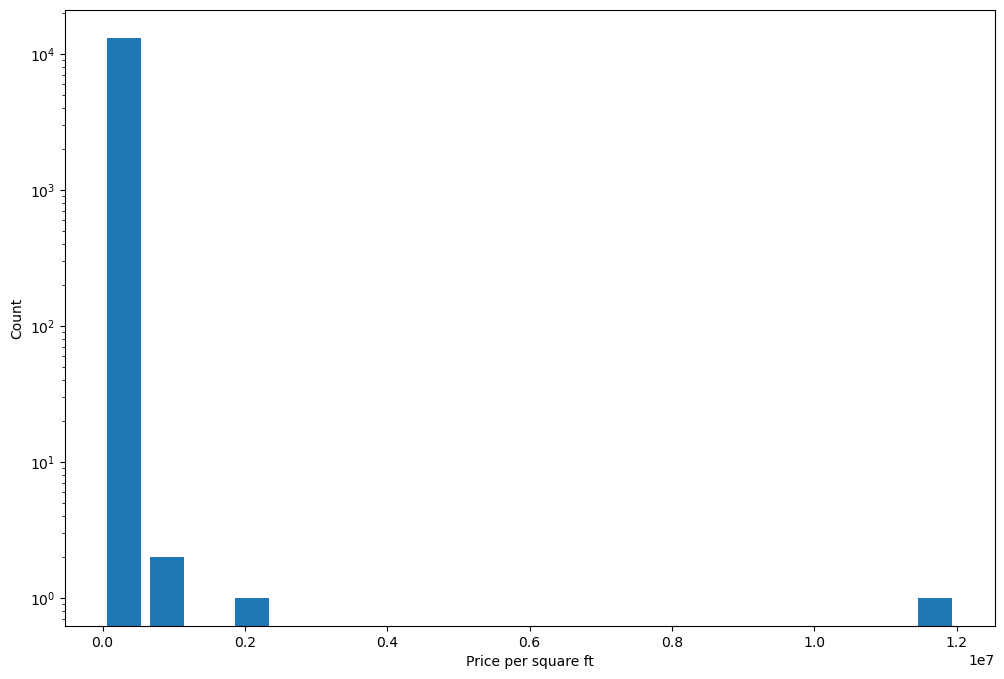

In [28]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building

### (1) Treat outliers using percentile first

In [29]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [30]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
12355,other,4 BHK,16335.0,4.0,149.0,4,912
1005,other,1 BHK,15.0,1.0,30.0,1,200000
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [31]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [32]:
df.shape

(13200, 7)

In [33]:
df.shape[0] - df2.shape[0]

28

#### We removed total 28 outliers

## (2) Now remove outliers using 4 standard deviation

In [34]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [35]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3340,other,19 BHK,2000.0,16.0,490.0,19,24500
3500,Kundalahalli,1 BHK,2400.0,1.0,650.0,1,27083
849,other,4 Bedroom,2400.0,4.0,640.0,4,26666
2371,other,5 Bedroom,3000.0,6.0,1000.0,5,33333
2258,other,4 Bedroom,3200.0,4.0,1200.0,4,37500
9360,HAL 2nd Stage,4 Bedroom,2280.0,4.0,615.0,4,26973
9873,other,3 Bedroom,2400.0,6.0,775.0,3,32291
2830,BTM 2nd Stage,4 Bedroom,1500.0,2.0,450.0,4,30000
4350,other,5 Bedroom,1750.0,5.0,450.0,5,25714
5144,Rajaji Nagar,3 Bedroom,2790.0,3.0,950.0,3,34050


In [36]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [37]:
df2.shape[0]-df3.shape[0]

125

#### In this step we removed total 125 outliers

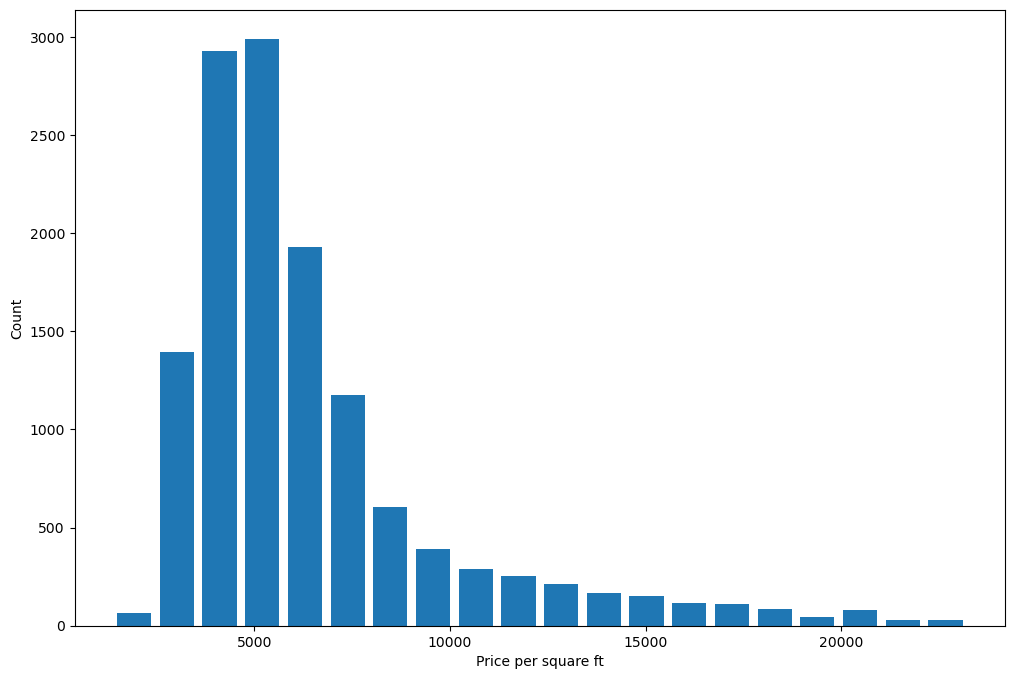

In [38]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

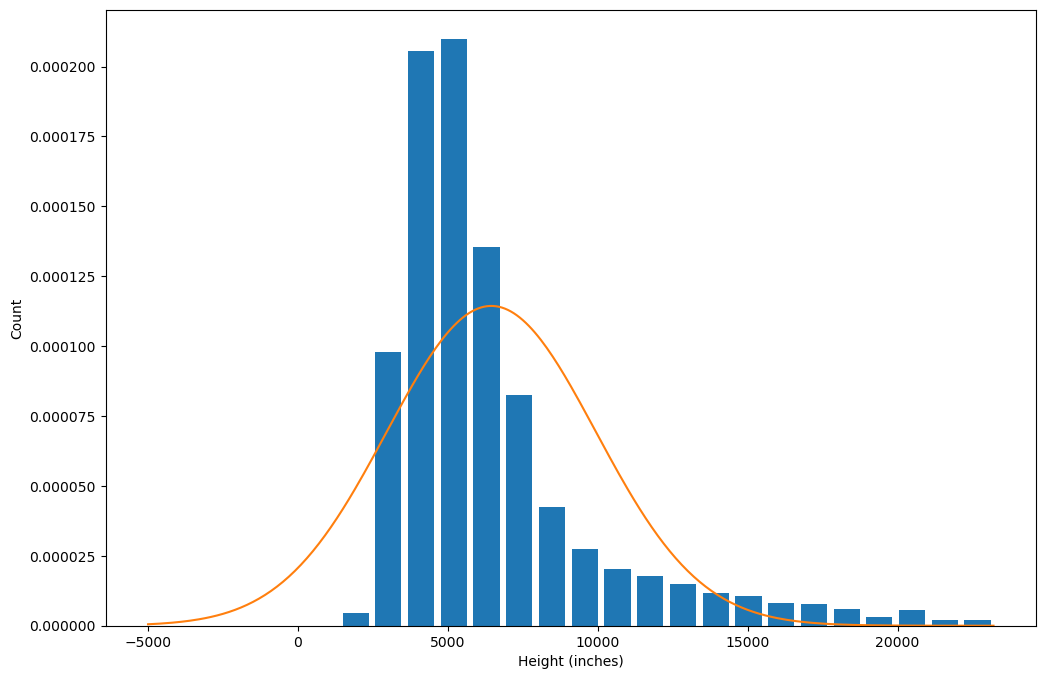

In [39]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

### (3) Now remove outliers using z score. Use z score of 4 as your thresold

In [40]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_9028\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
10972,other,4 BHK,8321.0,5.0,2912.0,4,34995,6.841634
5706,Banashankari,2 BHK,1290.0,2.0,80.0,2,6201,-0.111725
5719,Kodichikkanahalli,6 Bedroom,1600.0,4.0,200.0,6,12500,1.409398
2483,Sarjapur Road,3 BHK,1680.0,3.0,112.0,3,6666,0.000567
7897,Hulimavu,2 BHK,1000.0,2.0,45.0,2,4500,-0.522493
10670,Whitefield,3 BHK,1639.0,3.0,107.0,3,6528,-0.032759
9913,BTM Layout,3 BHK,2400.0,3.0,220.0,3,9166,0.604282
273,Balagere,2 BHK,1210.0,2.0,80.9,2,6685,0.005155
11868,Kumaraswami Layout,7 Bedroom,3200.0,7.0,150.0,7,4687,-0.477335
8552,Cunningham Road,4 BHK,5108.0,5.0,995.0,4,19479,3.094731


In [41]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [42]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
1548,Uttarahalli,5 Bedroom,400.0,5.0,200.0,5,50000,10.465136
3340,other,19 BHK,2000.0,16.0,490.0,19,24500,4.307234
7262,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
12334,Indira Nagar,4 Bedroom,2400.0,4.0,700.0,4,29166,5.434010
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283


In [43]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [44]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation